### IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
%matplotlib inline


### CONVERTING THE 28X28 IMAGE DATASET INTO A 784 COLUMN DATAFRAME

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('->loaded mnist images.')
train_images_df = pd.DataFrame([img.flatten() for img in train_images])
print('->train df created.')
test_images_df = pd.DataFrame([img.flatten() for img in test_images])
print('->test df created.')

->loaded mnist images.
->train df created.
->test df created.


### ADDING THE LABELS TO THE DATAFRAME

In [3]:
train_images_df['label'] = train_labels
test_images_df['label'] = test_labels

### SEPERATING THE LABELS AND FEATURES

In [4]:
X_train = train_images_df.drop('label', axis=1)
y_train = train_images_df['label']

X_test = test_images_df.drop('label', axis=1)
y_test = test_images_df['label']

### NORMALIZING THE DATA USING MINMAXSCALER

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN CLASSIFIER

In [6]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'KNN Accuracy Score: {accuracy_score(y_test, y_pred)}')

KNN Accuracy Score: 0.9705


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



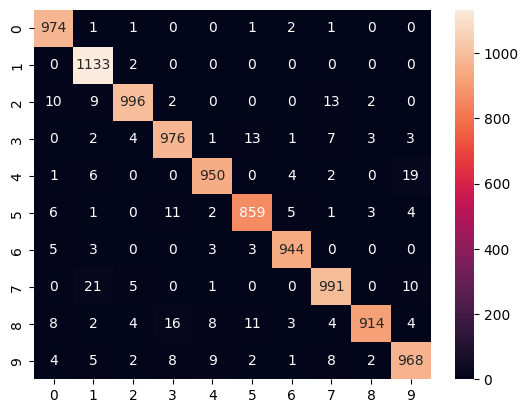

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d' )
print(classification_report(y_test, y_pred))

properly classified image:


<Figure size 300x300 with 0 Axes>

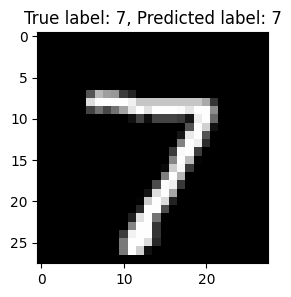

misclassified image:


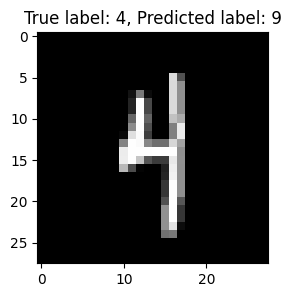

In [8]:
plt.figure(figsize=(3,3))
classified_indices = np.where(y_test == y_pred)[0]
if len(classified_indices) > 0:
    classified_index = classified_indices[0]
    classified_image = test_images[classified_index]
    print('properly classified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(classified_image, cmap='gray')
    plt.title(f'True label: {y_test[classified_index]}, Predicted label: {y_pred[classified_index]}')
    plt.show()
else:
    print('No properly classified images found.')
misclassified_indices = np.where(y_test != y_pred)[0]
if len(misclassified_indices) > 0:
    misclassified_index = misclassified_indices[0]
    misclassified_image = test_images[misclassified_index]
    print('misclassified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True label: {y_test[misclassified_index]}, Predicted label: {y_pred[misclassified_index]}')
    plt.show()
else:
    print('No misclassified images found.')



### NAIVE BAYES CLASSIFIER

In [9]:
model2 = GaussianNB()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred2)}')

Naive Bayes Accuracy: 0.5544


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.34      0.46      1010
           4       0.89      0.17      0.29       982
           5       0.54      0.05      0.09       892
           6       0.66      0.93      0.77       958
           7       0.88      0.27      0.41      1028
           8       0.28      0.68      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.55     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.55      0.52     10000



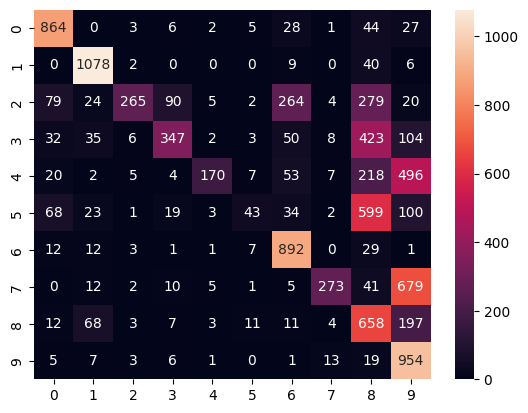

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d' )
print(classification_report(y_test, y_pred2))

properly classified image:


<Figure size 300x300 with 0 Axes>

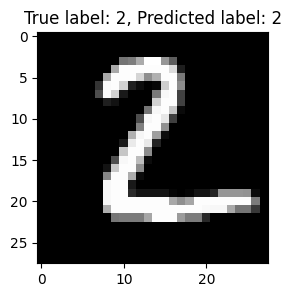

misclassified image:


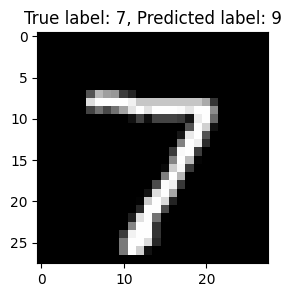

In [11]:
plt.figure(figsize=(3,3))
classified_indices = np.where(y_test == y_pred2)[0]
if len(classified_indices) > 0:
    classified_index = classified_indices[0]
    classified_image = test_images[classified_index]
    print('properly classified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(classified_image, cmap='gray')
    plt.title(f'True label: {y_test[classified_index]}, Predicted label: {y_pred2[classified_index]}')
    plt.show()
else:
    print('No properly classified images found.')
misclassified_indices = np.where(y_test != y_pred2)[0]
if len(misclassified_indices) > 0:
    misclassified_index = misclassified_indices[0]
    misclassified_image = test_images[misclassified_index]
    print('misclassified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True label: {y_test[misclassified_index]}, Predicted label: {y_pred2[misclassified_index]}')
    plt.show()
else:
    print('No misclassified images found.')



### XGBOOST CLASSIFIER

In [12]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(f'xgboost accuracy: {accuracy_score(y_test, y_pred3)}')

xgboost accuracy: 0.9795


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



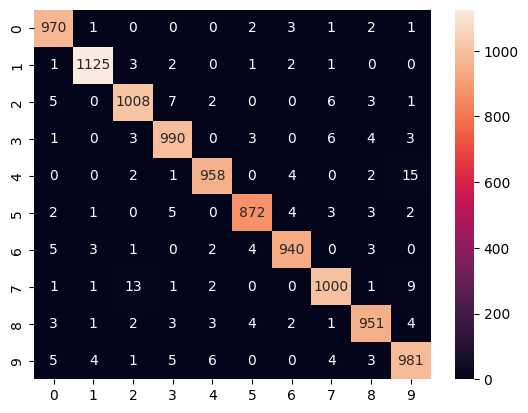

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d' )
print(classification_report(y_test, y_pred3))

properly classified image:


<Figure size 300x300 with 0 Axes>

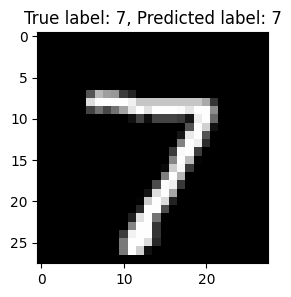

misclassified image:


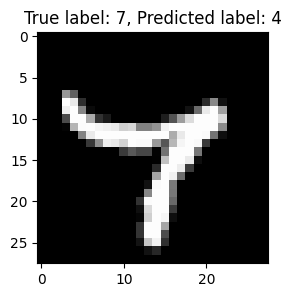

In [14]:
plt.figure(figsize=(3,3))
classified_indices = np.where(y_test == y_pred3)[0]
if len(classified_indices) > 0:
    classified_index = classified_indices[0]
    classified_image = test_images[classified_index]
    print('properly classified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(classified_image, cmap='gray')
    plt.title(f'True label: {y_test[classified_index]}, Predicted label: {y_pred3[classified_index]}')
    plt.show()
else:
    print('No properly classified images found.')
misclassified_indices = np.where(y_test != y_pred3)[0]
if len(misclassified_indices) > 0:
    misclassified_index = misclassified_indices[0]
    misclassified_image = test_images[misclassified_index]
    print('misclassified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True label: {y_test[misclassified_index]}, Predicted label: {y_pred3[misclassified_index]}')
    plt.show()
else:
    print('No misclassified images found.')



### SVC CLASSIFIER

In [15]:
model4 = SVC()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(f'support vector classifier accuracy: {accuracy_score(y_test, y_pred4)}')

support vector classifier accuracy: 0.9791


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



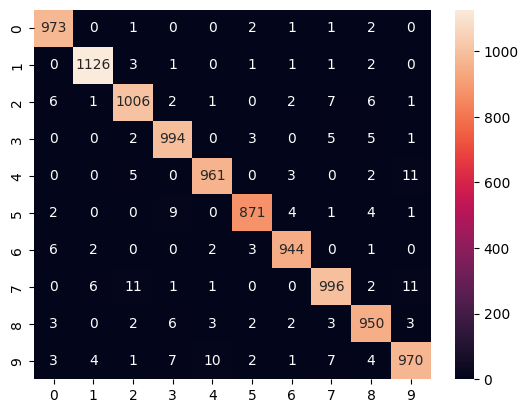

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, fmt='d' )
print(classification_report(y_test, y_pred4))

properly classified image:


<Figure size 300x300 with 0 Axes>

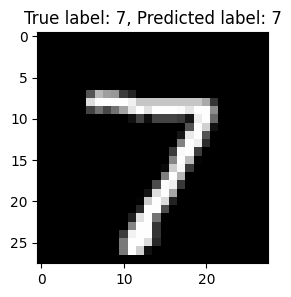

misclassified image:


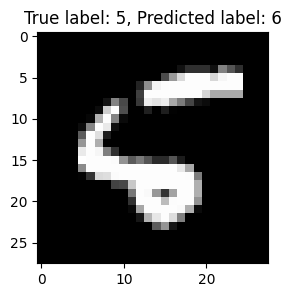

In [17]:
plt.figure(figsize=(3,3))
classified_indices = np.where(y_test == y_pred4)[0]
if len(classified_indices) > 0:
    classified_index = classified_indices[0]
    classified_image = test_images[classified_index]
    print('properly classified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(classified_image, cmap='gray')
    plt.title(f'True label: {y_test[classified_index]}, Predicted label: {y_pred4[classified_index]}')
    plt.show()
else:
    print('No properly classified images found.')
misclassified_indices = np.where(y_test != y_pred4)[0]
if len(misclassified_indices) > 0:
    misclassified_index = misclassified_indices[0]
    misclassified_image = test_images[misclassified_index]
    print('misclassified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True label: {y_test[misclassified_index]}, Predicted label: {y_pred4[misclassified_index]}')
    plt.show()
else:
    print('No misclassified images found.')



### RANDOM FOREST CLASSIFIER

In [18]:
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(f'random forest classifier accuracy: {accuracy_score(y_test, y_pred5)}')

random forest classifier accuracy: 0.9687


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



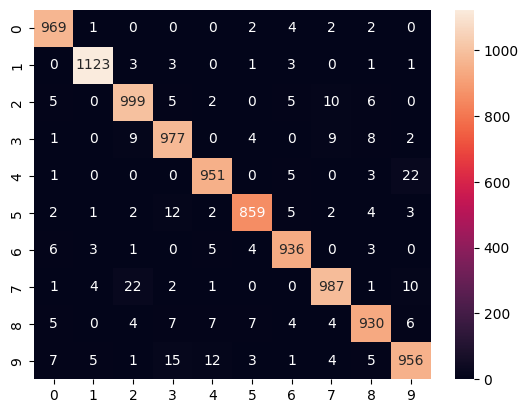

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True, fmt='d' )
print(classification_report(y_test, y_pred5))

properly classified image:


<Figure size 300x300 with 0 Axes>

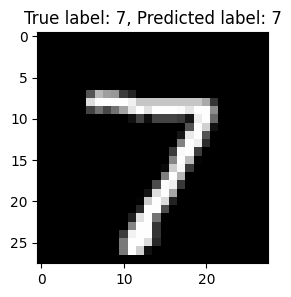

misclassified image:


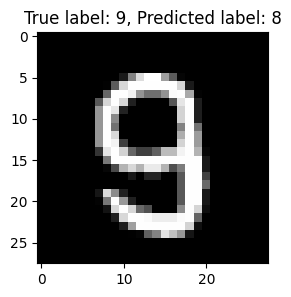

In [20]:
plt.figure(figsize=(3,3))
classified_indices = np.where(y_test == y_pred5)[0]
if len(classified_indices) > 0:
    classified_index = classified_indices[0]
    classified_image = test_images[classified_index]
    print('properly classified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(classified_image, cmap='gray')
    plt.title(f'True label: {y_test[classified_index]}, Predicted label: {y_pred5[classified_index]}')
    plt.show()
else:
    print('No properly classified images found.')
misclassified_indices = np.where(y_test != y_pred5)[0]
if len(misclassified_indices) > 0:
    misclassified_index = misclassified_indices[0]
    misclassified_image = test_images[misclassified_index]
    print('misclassified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True label: {y_test[misclassified_index]}, Predicted label: {y_pred5[misclassified_index]}')
    plt.show()
else:
    print('No misclassified images found.')



### VOTING CLASSIFIER

In [21]:
modelA = KNeighborsClassifier(n_neighbors=3)
modelB = GaussianNB()
model6 = VotingClassifier(estimators=[('lr', modelA), ('dt', modelB)], voting='hard')
model6.fit(X_train,y_train)
model6.score(X_test,y_test)
y_pred6 = model6.predict(X_test)
print(f'voting classifier accuracy: {accuracy_score(y_test, y_pred6)}')

voting classifier accuracy: 0.9221


              precision    recall  f1-score   support

           0       0.80      0.99      0.89       980
           1       0.84      1.00      0.91      1135
           2       0.96      0.87      0.91      1032
           3       0.93      0.90      0.91      1010
           4       0.96      0.94      0.95       982
           5       0.95      0.84      0.90       892
           6       0.97      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.97      0.84      0.90       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



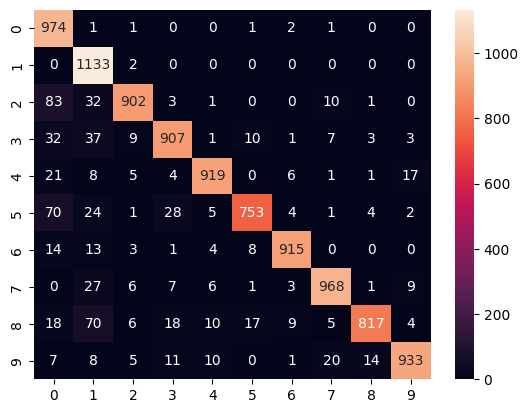

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred6), annot=True, fmt='d' )
print(classification_report(y_test, y_pred6))

properly classified image:


<Figure size 300x300 with 0 Axes>

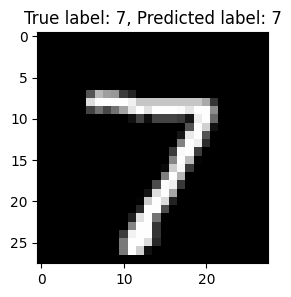

misclassified image:


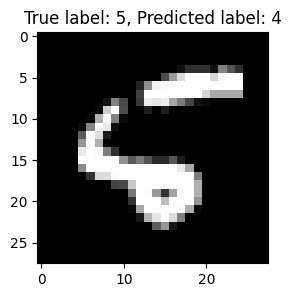

In [23]:
plt.figure(figsize=(3,3))
classified_indices = np.where(y_test == y_pred6)[0]
if len(classified_indices) > 0:
    classified_index = classified_indices[0]
    classified_image = test_images[classified_index]
    print('properly classified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(classified_image, cmap='gray')
    plt.title(f'True label: {y_test[classified_index]}, Predicted label: {y_pred6[classified_index]}')
    plt.show()
else:
    print('No properly classified images found.')
misclassified_indices = np.where(y_test != y_pred6)[0]
if len(misclassified_indices) > 0:
    misclassified_index = misclassified_indices[0]
    misclassified_image = test_images[misclassified_index]
    print('misclassified image:')
    plt.figure(figsize=(3,3))
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True label: {y_test[misclassified_index]}, Predicted label: {y_pred6[misclassified_index]}')
    plt.show()
else:
    print('No misclassified images found.')



Text(0.5, 1.0, 'Comparison of Model Accuracies for Different Classes')

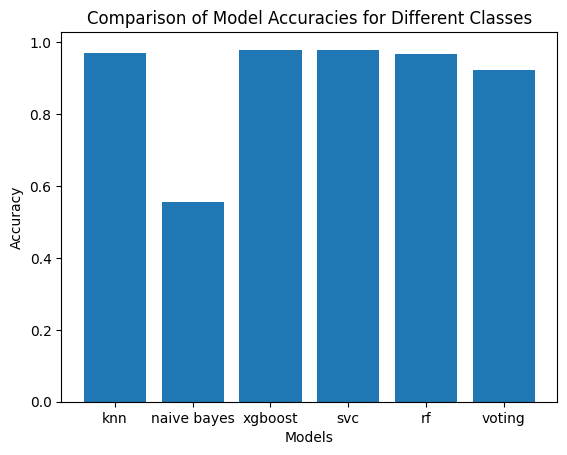

In [30]:
accuracies = [accuracy_score(y_test, y_pred), 
              accuracy_score(y_test, y_pred2), 
              accuracy_score(y_test, y_pred3), 
              accuracy_score(y_test, y_pred4), 
              accuracy_score(y_test, y_pred5), 
              accuracy_score(y_test, y_pred6)]
classes = ['knn', 'naive bayes', 'xgboost', 'svc', 'rf', 'voting']
plt.bar(classes, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies for Different Classes')

### FROM OUR RESULTS, XGBOOST HAS THE HIGHEST ACCURACY OF 97.95%